In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import mudata as md
import matplotlib.pyplot as plt

import gc
import sys
sys.path.append('../')

from utils.gglasso_pipeline import gg_lasso_network_analysis
from utils.utils import calc_sparsity
from sklearn.covariance import empirical_covariance
from latentcor import latentcor

### EC

In [2]:
ec_mudata = md.read("../data/preprocessed/ec_mudata_preprocessed.h5mu")
ec_adata = ec_mudata["rRNA_genes"].copy()
del(ec_mudata)
print(gc.collect())
ec_adata

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


1500


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


AnnData object with n_obs × n_vars = 2524 × 60
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'genes_match', 'protein_match', 'unmatch_genes'
    layers: 'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'

In [3]:
print(ec_adata.shape)
sc.pp.filter_genes(ec_adata, min_counts=1)
print(ec_adata.shape)
sc.pp.filter_cells(ec_adata, min_counts=1)
print(ec_adata.shape)

(2524, 60)
(2524, 57)
(2466, 57)


In [4]:
print("Sparity:\t\t", calc_sparsity(ec_adata.X.A))
print("Mean counts per gene:\t", np.mean(np.sum(ec_adata.X.A, axis=1)))
print("Median counts per gene:\t", np.median(np.sum(ec_adata.X.A, axis=1)))
print("Mean genes per cell: \t", np.mean(np.sum(ec_adata.X.A, axis=0)))
print("Median genes per cell:\t", np.median(np.sum(ec_adata.X.A, axis=0)))

Sparity:		 0.9081046086424496
Mean counts per gene:	 5.238037
Median counts per gene:	 4.0
Mean genes per cell: 	 226.61403
Median genes per cell:	 133.0


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


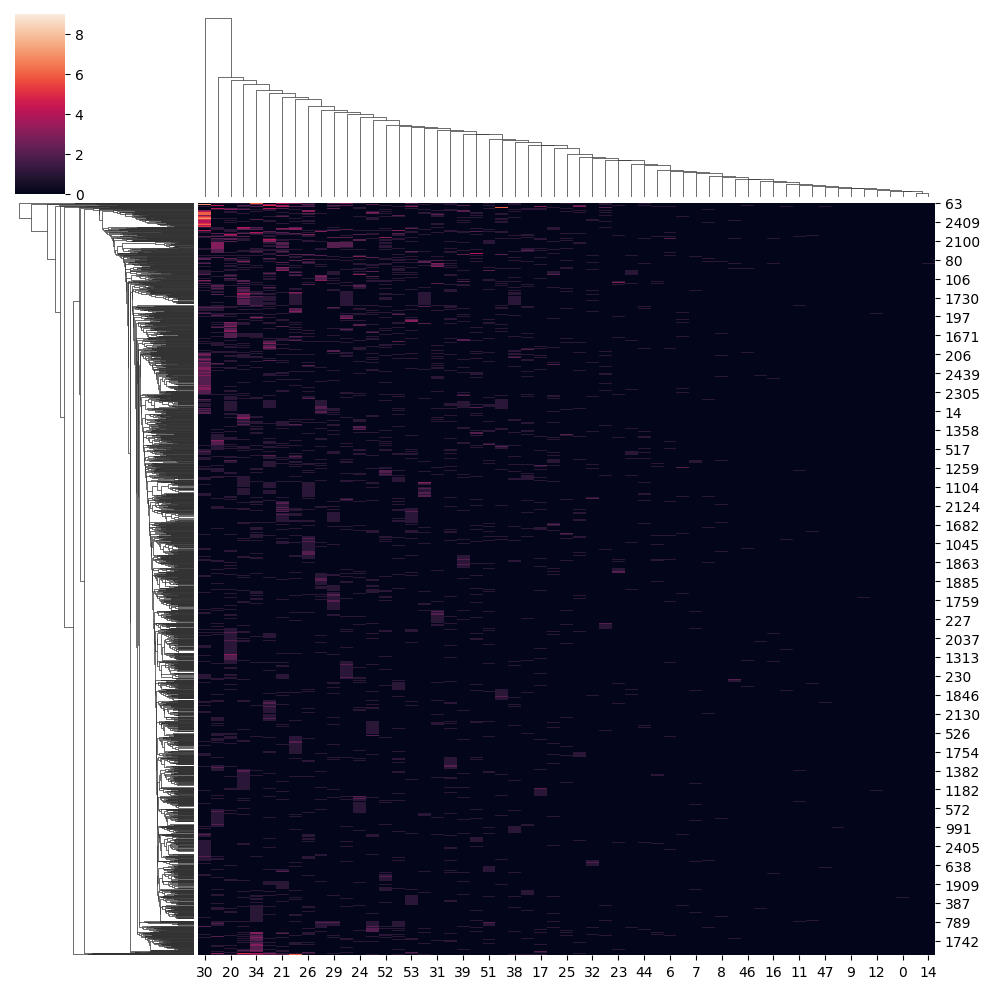

In [5]:
sns.clustermap(ec_adata.X.A)

0.3504565331230074
-0.025164340935486775


<Axes: >

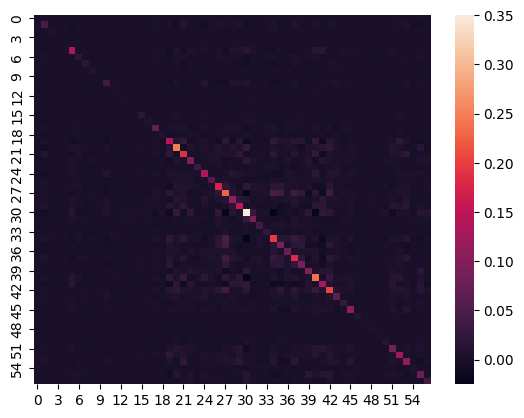

In [6]:
ec_est = empirical_covariance(ec_adata.layers['sqrt_counts'].A)
print(ec_est.max())
print(ec_est.min())
sns.heatmap(ec_est)

In [7]:
ec_ggl_latentcor = gg_lasso_network_analysis(N=ec_adata.shape[0], estimate=ec_est)
ec_ggl_latentcor.create_problem(latent=False)
ec_ggl_latentcor.model_selection(lambda1_range=np.logspace(0, -5, 200))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 24 iterations with status: optimal.
ADMM terminated after 35 iterations with status: optimal.
ADMM terminated after 35 iterations with status: optimal.
ADMM terminated after 36 iterations with status: optimal.
ADMM terminated after 45 iterations with status: optimal.
ADMM terminated after 48 iterations with status: optimal.
ADMM terminated after 50 iterations with status: optimal.
ADMM terminated after 49 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 17 iterations with status: optimal.
ADMM terminated after 49 iterations with status: optimal.
ADMM terminated after 46 iterations with status: optimal.
ADMM terminated after 47 iterations with status: optimal.
ADMM terminated after 48 iterations wi

In [8]:
ec_sol_latentcor = ec_ggl_latentcor.P.solution.precision_

<Axes: >

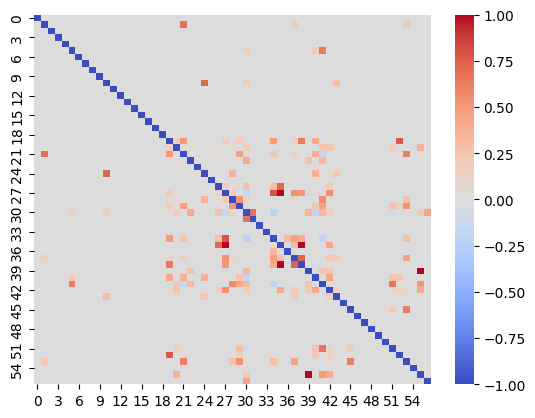

In [9]:
sns.heatmap(ec_sol_latentcor*-1, cmap="coolwarm", vmin=-1, vmax=1)

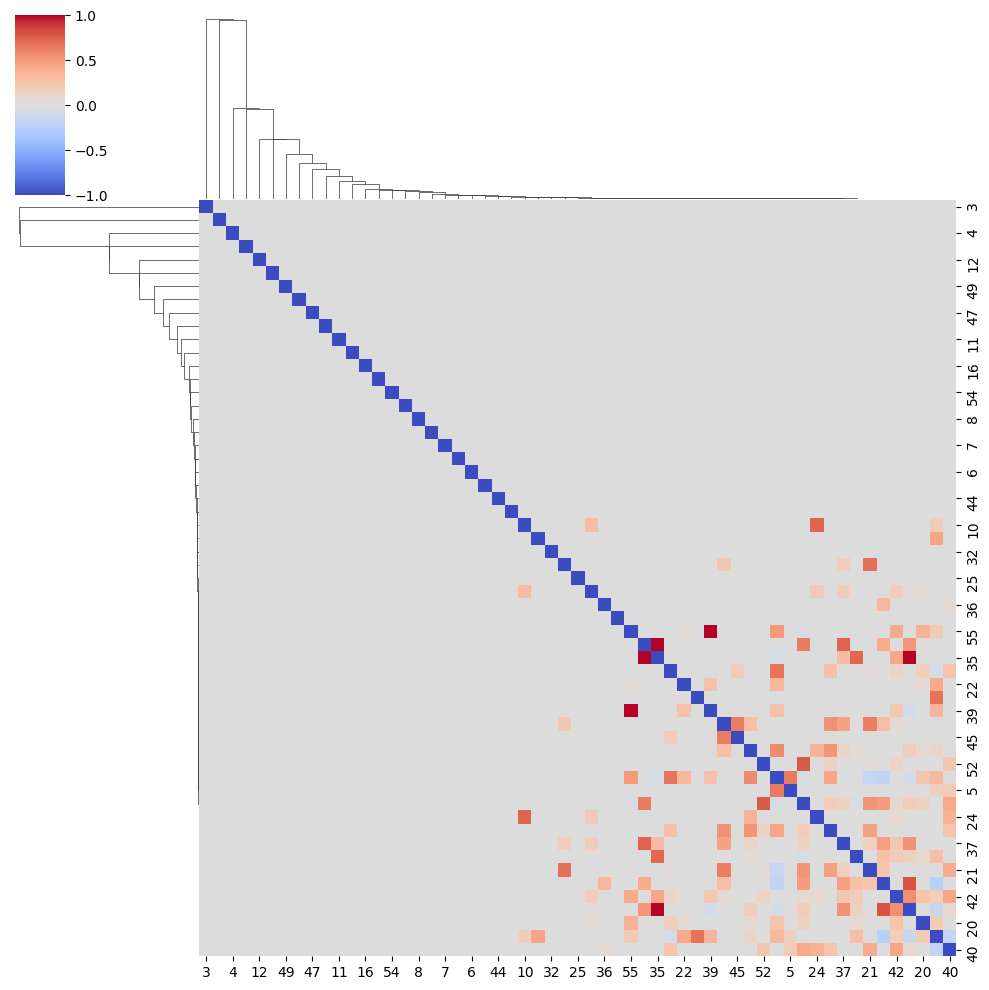

In [10]:
sns.clustermap(ec_sol_latentcor*-1, cmap="coolwarm", vmin=-1, vmax=1)

### EFM

In [11]:
efm_mudata = md.read("../data/preprocessed/efm_mudata_preprocessed.h5mu")
efm_adata = efm_mudata["rRNA_genes"].copy()
del(efm_mudata)
print(gc.collect())
efm_adata

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


1512


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\mudata\_core\mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


AnnData object with n_obs × n_vars = 4804 × 60
    obs: 'strains', 'n_genes_by_counts', 'total_counts', 'n_counts'
    var: 'strains', 'matchin_protein', 'protein', 'n_cells', 'protein_name', 'rRNA', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'genes_match', 'protein_match', 'unmatch_genes'
    layers: 'log1p', 'norm_counts', 'raw_counts', 'sqrt_counts'

In [12]:
print(efm_adata.shape)
sc.pp.filter_genes(efm_adata, min_counts=1)
print(efm_adata.shape)
sc.pp.filter_cells(efm_adata, min_counts=1)
print(efm_adata.shape)

(4804, 60)
(4804, 60)
(4564, 60)


In [13]:
print("Sparity:\t\t", calc_sparsity(efm_adata.X.A))
print("Mean counts per gene:\t", np.mean(np.sum(efm_adata.X.A, axis=1)))
print("Median counts per gene:\t", np.median(np.sum(efm_adata.X.A, axis=1)))
print("Mean genes per cell: \t", np.mean(np.sum(efm_adata.X.A, axis=0)))
print("Median genes per cell:\t", np.median(np.sum(efm_adata.X.A, axis=0)))

Sparity:		 0.9319127957931639
Mean counts per gene:	 4.0852323
Median counts per gene:	 3.0
Mean genes per cell: 	 310.75
Median genes per cell:	 235.5


c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


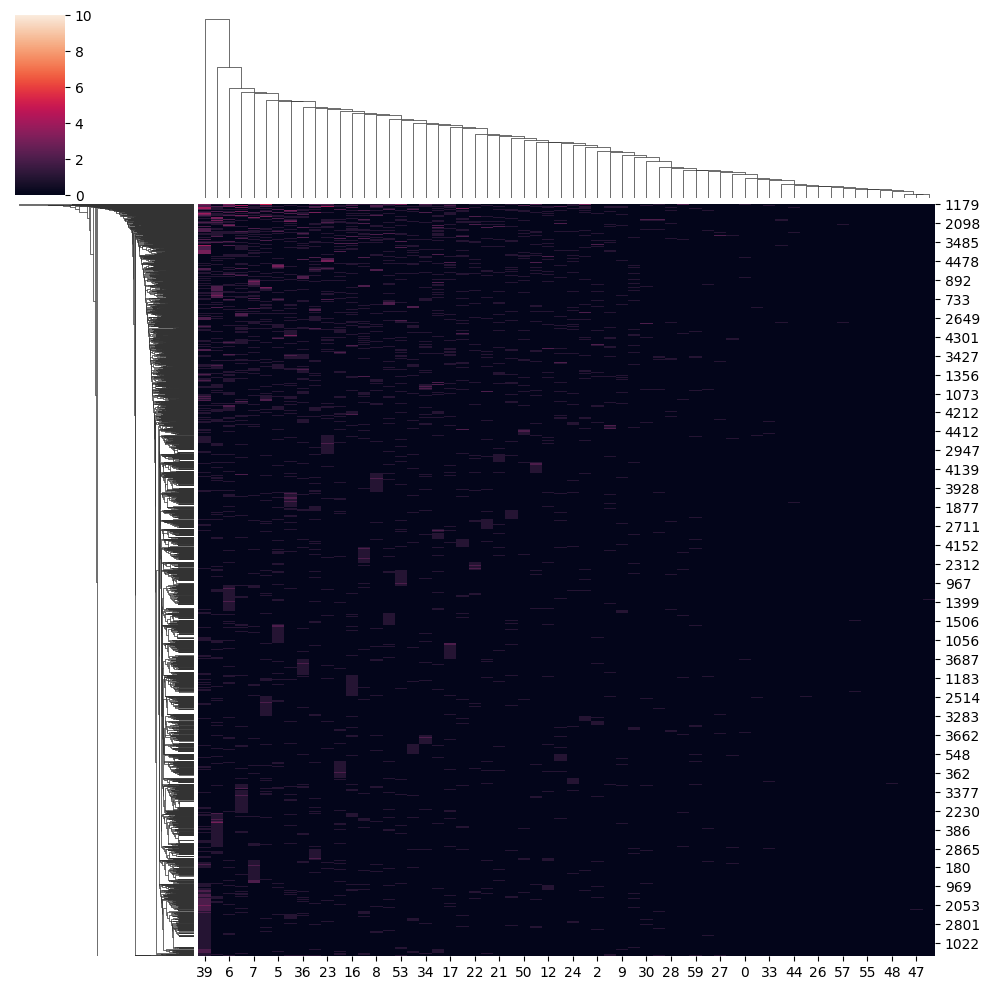

In [14]:
sns.clustermap(efm_adata.X.A)

0.30139356698558567
-0.0019740838843397552


<Axes: >

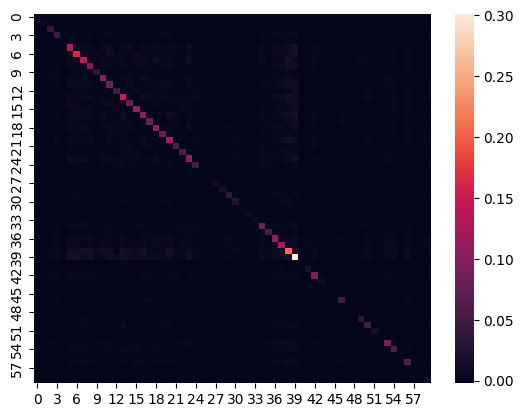

In [15]:
efm_est = empirical_covariance(efm_adata.layers['sqrt_counts'].A)
print(efm_est.max())
print(efm_est.min())
sns.heatmap(efm_est)

In [16]:
efm_ggl_latentcor = gg_lasso_network_analysis(N=efm_adata.shape[0], estimate=efm_est)
efm_ggl_latentcor.create_problem(latent=False)
efm_ggl_latentcor.model_selection(lambda1_range=np.logspace(0, -5, 200))

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}
ADMM terminated after 13 iterations with status: optimal.
ADMM terminated after 16 iterations with status: optimal.
ADMM terminated after 19 iterations with status: optimal.
ADMM terminated after 19 iterations with status: optimal.
ADMM terminated after 18 iterations with status: optimal.
ADMM terminated after 23 iterations with status: optimal.
ADMM terminated after 25 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 12 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 14 iterations with status: optimal.
ADMM terminated after 27 iterations with status: optimal.
ADMM terminated after 19 iterations with status: optimal.
ADMM terminated after 26 iterations with status: optimal.
ADMM terminated after 29 iterations with status: optimal.
ADMM terminated after 34 iterations wi

In [17]:
efm_sol_latentcor = efm_ggl_latentcor.P.solution.precision_

<Axes: >

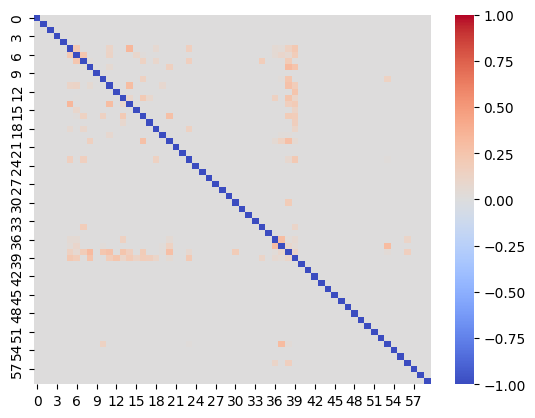

In [18]:
sns.heatmap(efm_sol_latentcor*-1, cmap="coolwarm", vmin=-1, vmax=1)

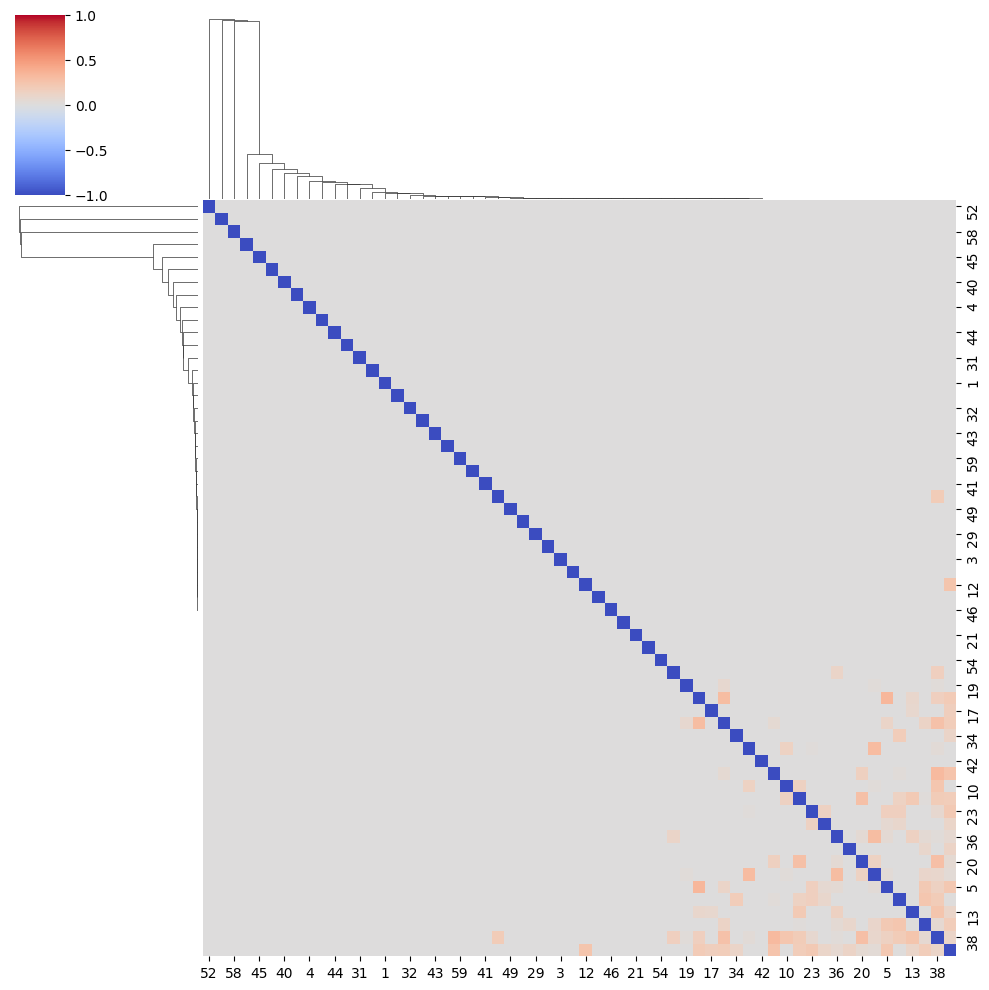

In [19]:
sns.clustermap(efm_sol_latentcor*-1, cmap="coolwarm", vmin=-1, vmax=1)

In [20]:
path_nSBM = '../data/raw/mudata_nSBM_hierarchy_2_final_4_species.h5mu'
data_nSBM = md.read_h5mu(path_nSBM)
data_nSBM

c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
c:\Users\Jan\.conda\envs\bacdrop\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 36469 × 33412
  3 modalities
    SC_genes:	36469 x 14009
      obs:	'strains'
      var:	'strains', 'matchin_protein', 'protein'
      uns:	'genes_match', 'protein_match', 'unmatch_genes'
    SC_proteins:	36469 x 13687
      obs:	'strains'
      var:	'genes_mapping', 'strains'
      uns:	'Consensus_tree', 'protein_adjacency_matrix', 'protein_match', 'protein_unmatch'
      varm:	'protein_hierarchy'
    SC_PCs:	36469 x 5716
      obs:	'strains'
      var:	'PCs_match'
      uns:	'Consensus_tree_PCs', 'PCs', 'PCs_to_genes', 'PCs_unmatch', 'Purity_info', 'Purity_info_unique', 'protein_match'
      varm:	'protein_hierarchy_PCs'

In [ ]:
data_nSBM["SC_PCs"].uns["PCs_to_genes"]

{'forDFlev11': array(['NP_250820.1', 'NP_252773.1', 'NP_308049.1', 'NP_308170.1',
        'NP_308621.1', 'NP_309305.1', 'NP_310137.2', 'NP_312049.1',
        'WP_004151634.1', 'WP_000813718.1', 'WP_004151789.1',
        'WP_002892386.1', 'WP_004167902.1', 'WP_004199140.1'], dtype=object),
 'forDFlev110': array(['WP_001093608.1'], dtype=object),
 'forDFlev1100': array(['NP_310346.1', 'WP_002903312.1'], dtype=object),
 'forDFlev11000': array(['WP_002889433.1'], dtype=object),
 'forDFlev11001': array(['NP_253240.1'], dtype=object),
 'forDFlev11003': array(['NP_250486.1', 'NP_252172.1', 'NP_252523.1', 'NP_252676.1',
        'NP_253250.1', 'NP_308056.1', 'NP_308615.1', 'NP_308707.1',
        'NP_310947.1', 'NP_311983.1', 'NP_313262.1', 'WP_002285916.1',
        'WP_002287445.1', 'WP_002287953.1', 'WP_002289325.1',
        'WP_002296621.1', 'WP_002912753.1', 'WP_002894696.1',
        'WP_004143010.1', 'WP_002887972.1', 'WP_002886952.1',
        'WP_004175365.1'], dtype=object),
 'forDFlev110

In [21]:
PCs = data_nSBM["SC_PCs"].uns["PCs"].copy()
PCs = {key: value for key, value in PCs.items() if key.startswith("lev")}
len(PCs)

5857

In [22]:
ec_PCs = dict()
for gene in ec_adata.var["protein"]:
    ec_PCs[gene] = []
    for cluster in PCs:
        if gene in PCs[cluster] and cluster.startswith("lev"):
            ec_PCs[gene].append(cluster)
print(ec_PCs)

{'NP_308053.1': ['lev00totlen11583'], 'NP_308198.1': ['lev00totlen1944'], 'NP_308942.1': ['lev00totlen12548'], 'NP_308959.1': ['lev010totlen3551'], 'NP_309015.2': ['lev00totlen1704'], 'NP_309021.1': ['lev08totlen31171'], 'NP_309494.1': ['lev00totlen11251'], 'NP_310450.1': ['lev00totlen12166'], 'NP_310451.3': ['lev00totlen12492'], 'NP_311104.1': ['lev00totlen1755'], 'NP_311496.1': ['lev00totlen15605'], 'NP_311499.1': ['lev00totlen1201'], 'NP_311975.1': ['lev00totlen1102'], 'NP_312073.1': ['lev00totlen14197'], 'NP_312086.1': ['lev00totlen11680'], 'NP_312091.1': ['lev00totlen12102'], 'NP_312092.1': ['lev00totlen12627'], 'NP_312130.1': ['lev00totlen14834'], 'NP_312131.1': ['lev00totlen14086'], 'NP_312186.1': ['lev00totlen13228'], 'NP_312188.1': ['lev00totlen1812'], 'NP_312189.1': ['lev00totlen11685'], 'NP_312190.1': ['lev00totlen1824'], 'NP_312191.1': ['lev00totlen15070'], 'NP_312193.1': ['lev00totlen13925'], 'NP_312194.1': ['lev00totlen16284'], 'NP_312195.1': ['lev00totlen1289'], 'NP_3121

In [23]:
efm_PCs = dict()
for gene in efm_adata.var["protein"]:
    efm_PCs[gene] = []
    for cluster in PCs:
        if gene in PCs[cluster] and cluster.startswith("lev"):
            efm_PCs[gene].append(cluster)
print(efm_PCs)

{'WP_002286913.1': ['lev00totlen15605'], 'WP_002287321.1': ['lev00totlen1102'], 'WP_002287505.1': ['lev00totlen14834'], 'WP_002288370.1': ['lev00totlen12685'], 'WP_002288372.1': ['lev00totlen13746'], 'WP_002288655.1': ['lev00totlen13141'], 'WP_002288657.1': ['lev00totlen14130'], 'WP_002288659.1': ['lev00totlen11073'], 'WP_002288661.1': ['lev00totlen11227'], 'WP_002288664.1': ['lev00totlen1268'], 'WP_002288668.1': ['lev00totlen11852'], 'WP_002288669.1': ['lev00totlen16203'], 'WP_002288670.1': ['lev00totlen12318'], 'WP_002288671.1': ['lev00totlen14377'], 'WP_002288673.1': ['lev00totlen1177'], 'WP_002288675.1': ['lev00totlen14334'], 'WP_002288677.1': ['lev00totlen12238'], 'WP_002288679.1': ['lev00totlen14253'], 'WP_002288681.1': ['lev00totlen1289'], 'WP_002288686.1': ['lev00totlen11993'], 'WP_002288687.1': ['lev00totlen13925'], 'WP_002288710.1': ['lev00totlen15070'], 'WP_002288713.1': ['lev00totlen1824'], 'WP_002288714.1': ['lev00totlen11685'], 'WP_002288716.1': ['lev00totlen13228'], 'WP_

In [24]:
ec_adata.var["PC"] = np.array(list(ec_PCs.values())).squeeze()
efm_adata.var["PC"] = np.array(list(efm_PCs.values())).squeeze()

In [25]:
ec_adata.var["idx"] = range(0, ec_adata.shape[1])
efm_adata.var["idx"] = range(0, efm_adata.shape[1])

In [37]:
ec_adata.var

,strains,matchin_protein,protein,n_cells,protein_name,rRNA,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_counts,PC,idx
cds-NP_308053.1,GSM5456505_PsA_CDS,match,NP_308053.1,7,30S ribosomal subunit protein S20,True,2,0.000792,99.920761,2.0,2.0,lev00totlen11583,0
cds-NP_308198.1,GSM5456505_PsA_CDS,match,NP_308198.1,205,30S ribosomal subunit protein S2,True,107,0.043978,95.760697,111.0,111.0,lev00totlen1944,1
cds-NP_308942.1,GSM5456505_PsA_CDS,match,NP_308942.1,33,ribosomal protein S12 methylthiotransferase,True,12,0.004754,99.524564,12.0,12.0,lev00totlen12548,2
cds-NP_308959.1,GSM5456505_PsA_CDS,match,NP_308959.1,1,ribosomal protein S6 modification protein,True,1,0.000396,99.960380,1.0,1.0,lev010totlen3551,3
cds-NP_309015.2,GSM5456505_PsA_CDS,match,NP_309015.2,4,ribosomal protein S12 methylthiotransferase ac...,True,2,0.000792,99.920761,2.0,2.0,lev00totlen1704,4
cds-NP_309021.1,GSM5456505_PsA_CDS,match,NP_309021.1,650,30S ribosomal subunit protein S1,True,342,0.152536,86.450079,385.0,385.0,lev08totlen31171,5
cds-NP_309494.1,GSM5456505_PsA_CDS,match,NP_309494.1,100,50S ribosomal subunit protein L32,True,49,0.019810,98.058637,50.0,50.0,lev00totlen11251,6
cds-NP_310450.1,GSM5456506_Kp_CDS,match,NP_310450.1,90,50S ribosomal subunit protein L20,True,46,0.018225,98.177496,46.0,46.0,lev00totlen12166,7
cds-NP_310451.3,GSM5456506_Kp_CDS,match,NP_310451.3,65,50S ribosomal subunit protein L35,True,28,0.011094,98.890650,28.0,28.0,lev00totlen12492,8
cds-NP_311104.1,GSM5456506_Kp_CDS,match,NP_311104.1,7,50S ribosomal subunit protein L25,True,2,0.001189,99.920761,3.0,3.0,lev00totlen1755,9


In [27]:
efm_adata.var.loc[efm_adata.var["PC"] == "lev00totlen11583"]

,strains,matchin_protein,protein,n_cells,protein_name,rRNA,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_counts,PC,idx
cds-WP_002292188.1,GSM5456506_Kp_CDS,match,WP_002292188.1,17,WP_002292188.1 MULTISPECIES: 30S ribosomal pro...,True,12,0.002498,99.750208,12.0,12.0,lev00totlen11583,44


In [28]:
def extract_part(text):
    parts = text.split()
    filtered_parts = parts[1:-5]  # Remove the last part
    result = ' '.join(filtered_parts)  # Join the remaining parts
    return result

In [29]:
ec_adata.var["protein_name"] = ec_adata.var["protein_name"].apply(lambda x: extract_part(x))
efm_adata.var["protein_name"] = efm_adata.var["protein_name"].apply(lambda x: extract_part(x))

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

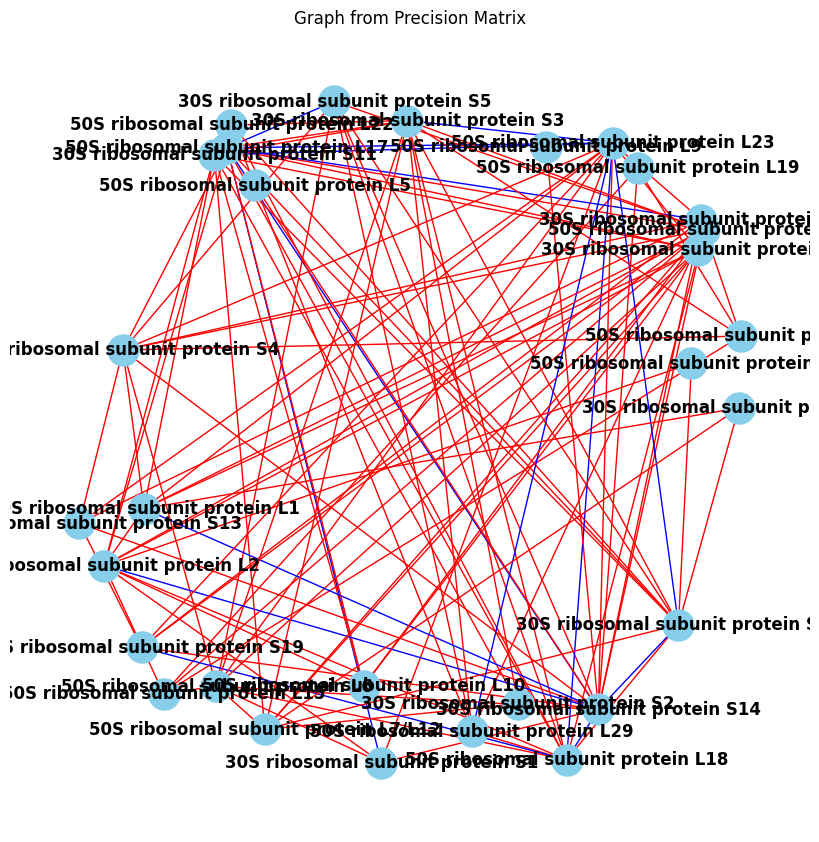

In [31]:
ec_G = nx.Graph()

# Add nodes to the graph
for idx, row in ec_adata.var.iterrows():
    ec_G.add_node(row['protein_name'])

# Add edges to the graph based on the weights
n = len(ec_adata.var)
for i in range(n):
    for j in range(i + 1, n):
        weight = ec_sol_latentcor[i, j]
        if weight != 0:
            ec_G.add_edge(ec_adata.var.iloc[i]['protein_name'], ec_adata.var.iloc[j]['protein_name'], weight=weight)

# Set edge colors based on weight sign
edge_colors = []
for edge in ec_G.edges(data=True):
    weight = edge[2]['weight']
    if weight > 0:
        edge_colors.append('blue')  # Positive edge
    elif weight < 0:
        edge_colors.append('red')  # Negative edge

# Find connected components and remove isolated nodes<
connected_components = list(nx.connected_components(ec_G))
for component in connected_components:
    if len(component) == 1:
        ec_G.remove_node(list(component)[0])

# Draw the graph
pos = nx.spring_layout(ec_G)
plt.figure(figsize=(8, 8))
nx.draw(ec_G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', edge_color=edge_colors)
plt.title('Graph from Precision Matrix')


plt.show()

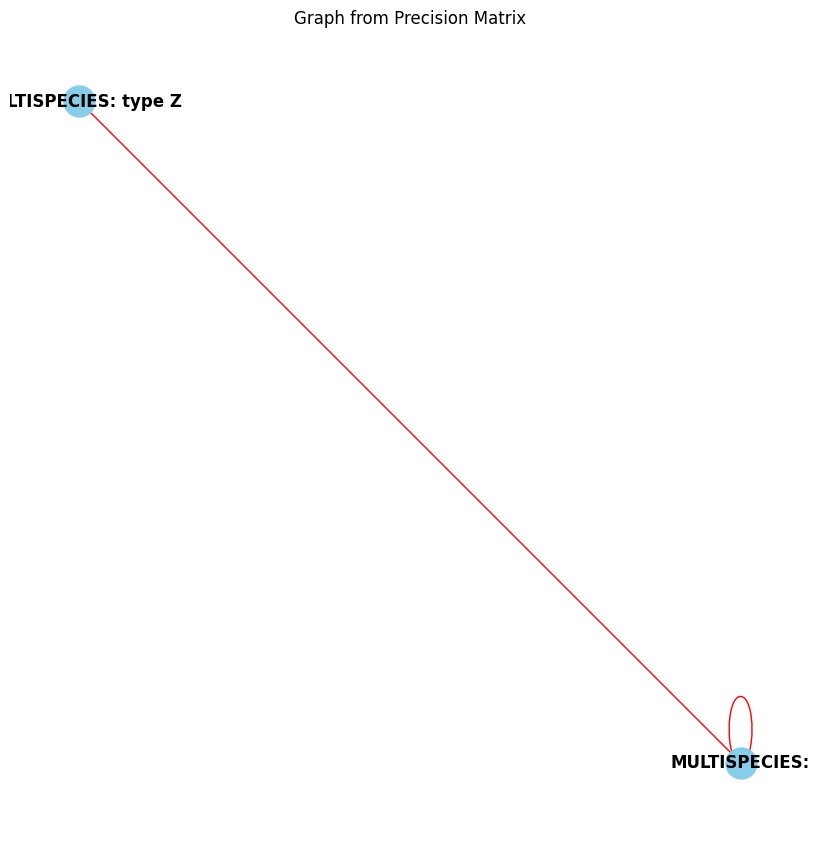

In [ ]:
efm_G = nx.Graph()

# Add nodes to the graph
for idx, row in efm_adata.var.iterrows():
    efm_G.add_node(row['protein_name'])

# Add edges to the graph based on the weights
n = len(efm_adata.var)
for i in range(n):
    for j in range(i + 1, n):
        weight = efm_sol_latentcor[i, j]
        if weight != 0:
            efm_G.add_edge(efm_adata.var.iloc[i]['protein_name'], efm_adata.var.iloc[j]['protein_name'], weight=weight)

# Set edge colors based on weight sign
edge_colors = []
for edge in efm_G.edges(data=True):
    weight = edge[2]['weight']
    if weight > 0:
        edge_colors.append('blue')  # Positive edge
    elif weight < 0:
        edge_colors.append('red')  # Negative edge

# Find connected components and remove isolated nodes<
connected_components = list(nx.connected_components(efm_G))
for component in connected_components:
    if len(component) == 1:
        efm_G.remove_node(list(component)[0])

# Draw the graph
pos = nx.spring_layout(efm_G)
plt.figure(figsize=(8, 8))
nx.draw(efm_G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold', edge_color=edge_colors)
plt.title('Graph from Precision Matrix')


plt.show()